In [1]:
import mammoth
from IPython.core.display import display, HTML
import subprocess
import os
import glob
import string
import stat
import random
from bs4 import BeautifulSoup
import re
from difflib import SequenceMatcher
import shutil 
import filecmp
import difflib

In [6]:
# COUNT THE DOC AND DOCX FILES

allDocFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)

allDocFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.doc"
allFilesDoc = glob.glob(allDocFilesGlob, recursive=True)

print("doc: %s\ndocx: %s" % (str(len(allFilesDoc)), str(len(allFilesDocx))))

doc: 78
docx: 5892


In [8]:
# FIND IDENTICAL FILES

allDocFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)
print(len(allFilesDocx))

identicalDict = {}

for i,filename in enumerate(allFilesDocx):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

5892
0
1000
2000
3000
4000
5000
repeated files: 38


In [10]:
# DELETE IDENTICAL FILES

for thisKey in identicalDict.keys():
    thisFileList = identicalDict[thisKey]
    for thisFile in thisFileList:
        os.remove(thisFile)

In [12]:
# CHECK IDENTICAL DOCX FILES HAVE BEEN ELIMINATED

allDocFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.docx"
allFilesDocx = glob.glob(allDocFilesGlob, recursive=True)
print(len(allFilesDocx))

identicalDict = {}

for i,filename in enumerate(allFilesDocx):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

5854
0
1000
2000
3000
4000
5000
repeated files: 0


In [13]:
def stripInfo(soup):
    regExpList = [r'Coffman', r'149 Atlantic',r'Swampscott',r'\$\d*\.\d\d']
    for thisRegExp in regExpList:
        for elem in soup(text=re.compile(thisRegExp)):
            elem.parent.decompose()

In [14]:
# CONVERT TO HTML, DELETE SENSITIVE INFORMATION (ADDRESS, ORDER INFO, ETC....), SAVE HTML FILE

allDocFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.docx"
allFiles = glob.glob(allDocFilesGlob, recursive=True)
convertErrors = []
regExErrors = []
writeErrors = []
print(len(allFiles))

for i,filename in enumerate(allFiles):
    if i % 1000 == 0:
        print(i)
    with open(filename, "rb") as docx_file:
        try:
            result = mammoth.convert_to_html(docx_file)
            html = result.value
            soup = BeautifulSoup(html, 'html.parser')
            try:
                stripInfo(soup)
                html = str(soup)
                try:
                    thisFileName = filename[0:-5] + ".html"
                    with open(thisFileName, "w") as thisHtmlFile:
                        thisHtmlFile.write(str(html))
                except:
                    writeErrors.append(filename)
            except:
                regExErrors.append(filename)
        except:
            convertErrors.append(filename)
    
len(writeErrors), len(regExErrors), len(convertErrors)

5854
0
1000
2000
3000
4000
5000


(0, 11, 70)

In [16]:
# FIND IDENTICAL HTML FILES

allFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

identicalDict = {}

for i,filename in enumerate(allFiles):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

5773
0
1000
2000
3000
4000
5000
repeated files: 1281


In [17]:
# DELETE IDENTICAL HTML FILES AND CORRESPONDING DOCX FILES

htmlRemoveErrors = []
docxRemoveErrors = []

for thisKey in identicalDict.keys():
    thisFileList = identicalDict[thisKey]
    for thisFile in thisFileList:
        thisDocxFile = thisFile[0:-5] + ".docx"
        
        try:
            os.remove(thisFile)
        except:
            htmlRemoveErrors.append(thisFile)
        try:
            os.remove(thisDocxFile)
        except:
            docxRemoveErrors.append(thisDocxFile)
            
len(htmlRemoveErrors), len(docxRemoveErrors)            

(0, 0)

In [19]:
# CHECK IDENTICAL HTML FILES HAVE BEEN ELIMINATED

allFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

identicalDict = {}

for i,filename in enumerate(allFiles):
    flag = False
    if i % 1000 == 0:
        print(i)
    for thisKey in identicalDict.keys():
        if filecmp.cmp(thisKey, filename):
            identicalDict[thisKey].append(filename)
            flag = True
            break
    if not flag:
        identicalDict[filename] = []
        
print("repeated files: " + str(sum([len(value) for key,value in identicalDict.items()])))

4492
0
1000
2000
3000
4000
repeated files: 0


In [20]:
# MEASURE TO DETECT DUPLICATES AND NEAR DUPLICATES

allFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

simHTMLList = []

for i,firstPath in enumerate(allFiles):
    if i % 1000 == 0:
        print(i)
    for j in range(i+1, len(allFiles)):
        secondPath = allFiles[j]
        score = SequenceMatcher(None, firstPath, secondPath).ratio()
        simHTMLList.append((firstPath, secondPath, score))
        
simHTMLList = sorted(simHTMLList, key = lambda x: x[2], reverse = True)


4492
0
1000
2000
3000
4000


In [21]:
simHTMLList[0:1000]

[('/home/ubuntu/data/rockArtProject/anikaDocx0/A154-Eur-Czech Republic-Dolní Věstonice-Figurine-Anthropomorphic-Female-Ceramic-29,000–22,000 BP .html',
  '/home/ubuntu/data/rockArtProject/anikaDocx0/A154-Eur-Czech Republic-Dolní Věstonice-Figurine-Anthropomorphic-Female-Ceramic-29,000–22,000 BP.html',
  0.9965635738831615),
 ('/home/ubuntu/data/rockArtProject/anikaDocx9/A66-Am, S-Colombia-Tairona-Tumbaga-Woman kneeling with hands on her abdomen-1000-1500 CE.html',
  '/home/ubuntu/data/rockArtProject/anikaDocx9/A66-Am, S-Colombia-Tairona-Tumbaga-Woman kneeling with hands on her abdomen-1000-15000 CE.html',
  0.9963636363636363),
 ('/home/ubuntu/data/rockArtProject/anikaDocx0/A2029-Eur-Germany-Vogelherdhöhle-Figurine-Mammoth-Ivory-Middle Paleolithic-40,000 BP.html',
  '/home/ubuntu/data/rockArtProject/anikaDocx0/A2029- Eur-Germany-Vogelherdhöhle-Figurine-Mammoth-Ivory-Middle Paleolithic-40,000 BP.html',
  0.9962546816479401),
 ('/home/ubuntu/data/rockArtProject/anikaDocx8/A000-MEX- Mezca

In [7]:
index = 0

#htmlFile1, htmlFile2, simScore = simHTMLList[index]
htmlFile1, htmlFile2, simScore = simNameList[index]

with open(htmlFile1, 'r') as fp:
    html1 = fp.readlines()[0]
    
with open(htmlFile2, 'r') as fp:
    html2 = fp.readlines()[0]

print(htmlFile1)
print(htmlFile2)
print(simScore)

/home/ubuntu/data/rockArtProject/anikaDocx9/A1027. DIS-AM,C- Costa Rica-Nicoya Culture-Figurine-Female-Ritual Specialist-Ceramic-800-1000 CE.html
/home/ubuntu/data/rockArtProject/anikaDocx9/A1027. DIS-AM,C- Costa Rica-Guanacaste¬-Nicoya Culture-Figurine-Female-Ritual Specialist-Large Ceramic-500 CE–1000 CE.html
1.0



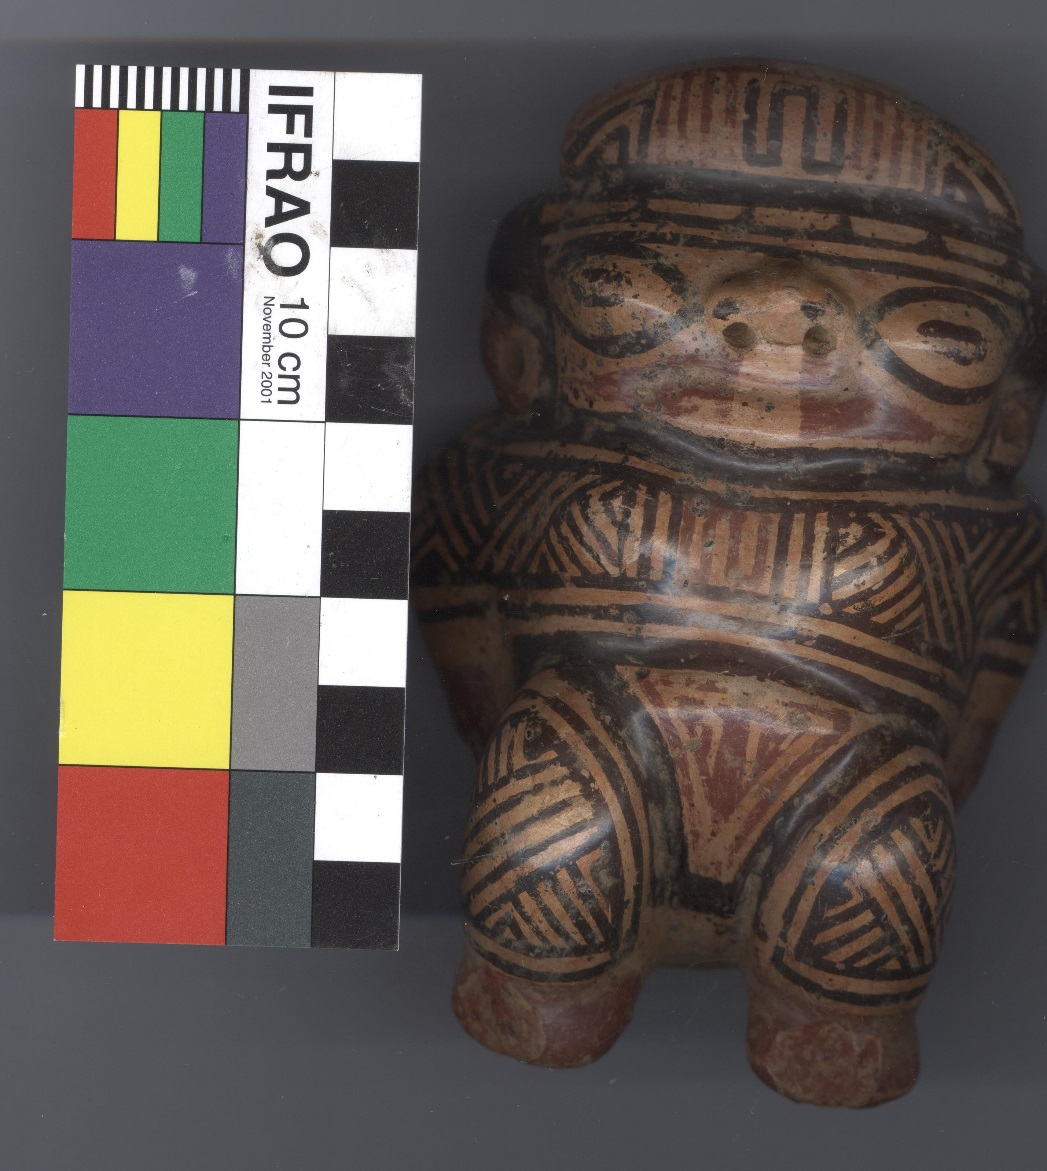
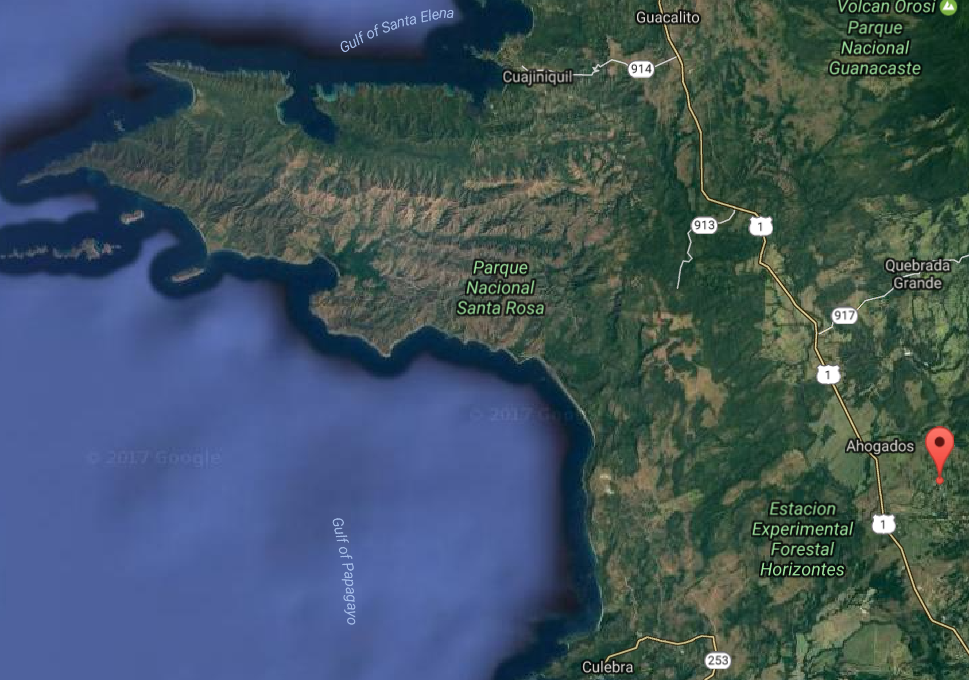
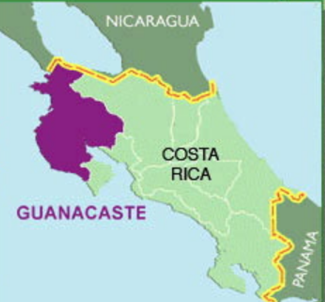
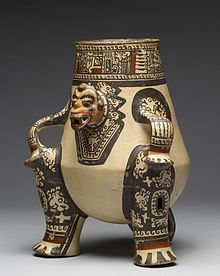

In [8]:
display(HTML(html1))


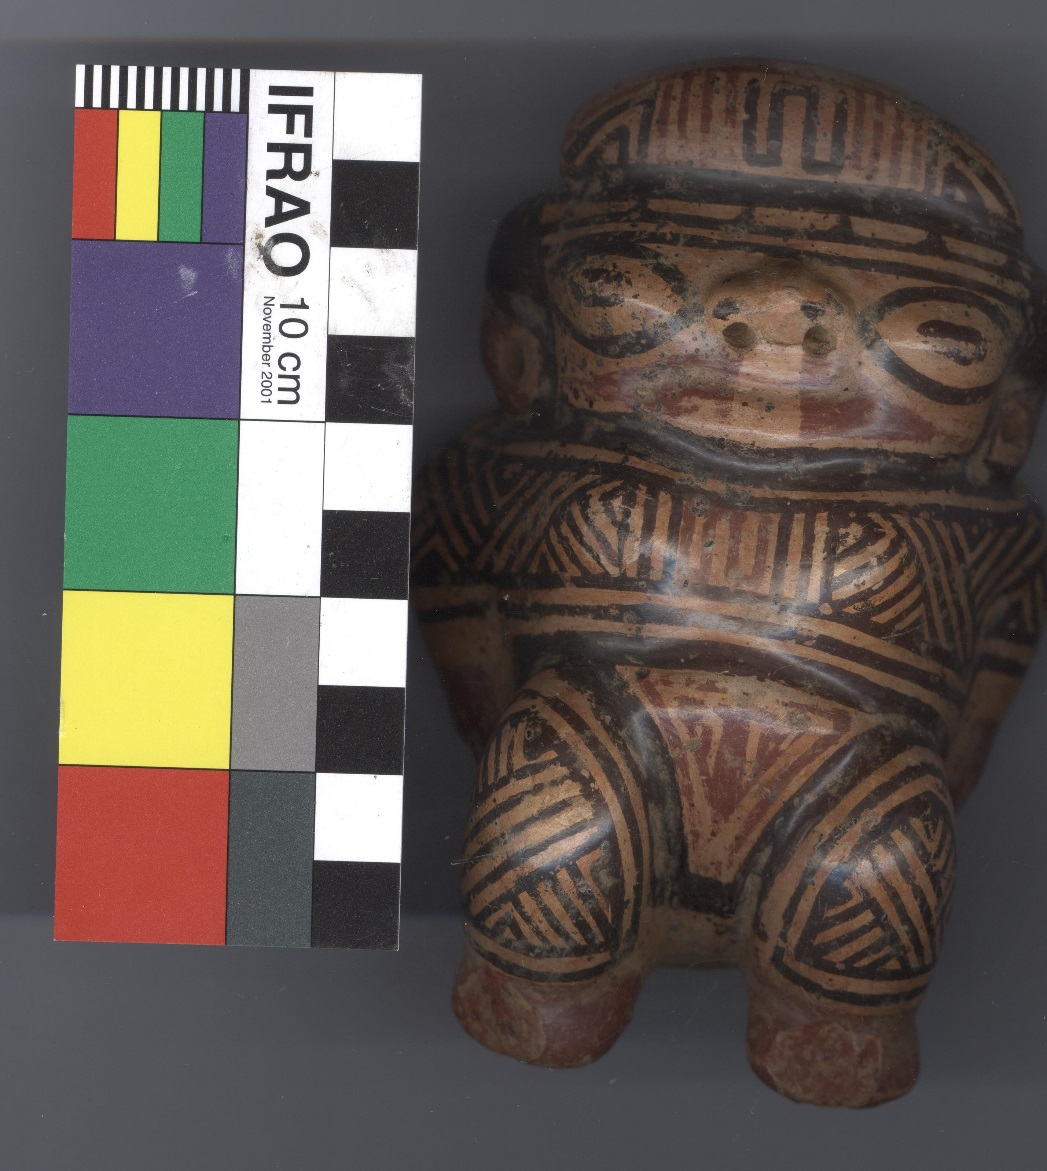
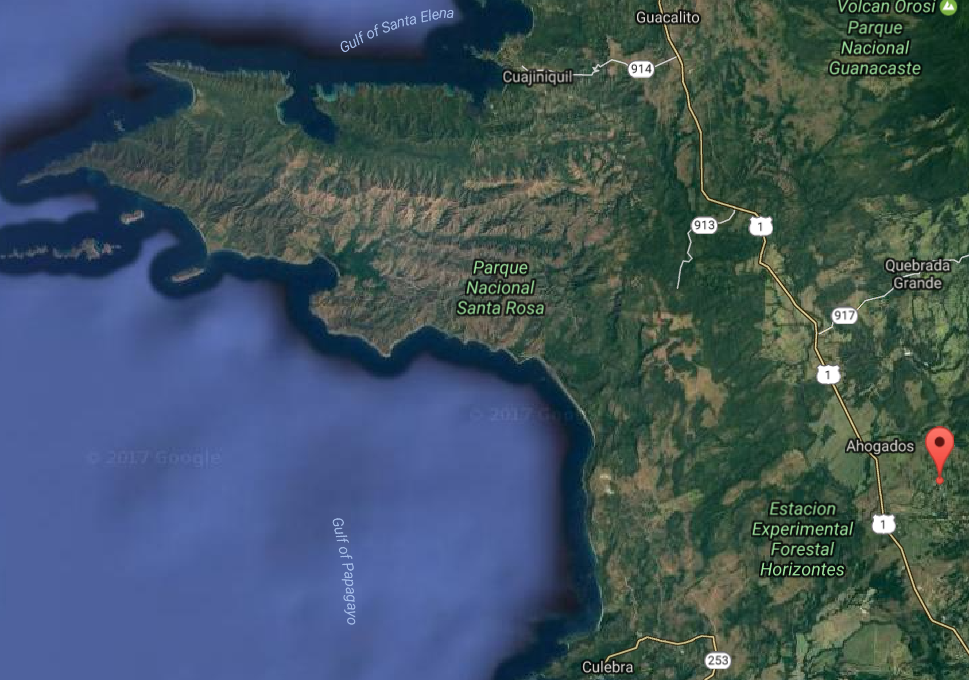
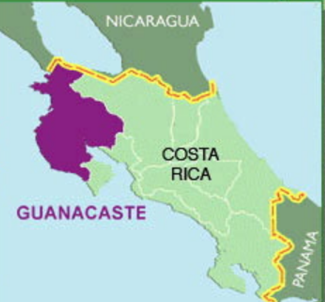
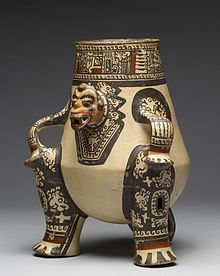

In [9]:
display(HTML(html2))

In [2]:
# MEASURE SIMILARITY OF ALL FILENAMES TO DETECT DUPLICATES AND NEAR DUPLICATES

allFilesGlob = "/home/ubuntu/data/rockArtProject/**/*.html"
allFiles = glob.glob(allFilesGlob, recursive=True)
print(len(allFiles))

simNameList = []

for i in range(len(allFiles)):
    if i % 1000 == 0:
        print(i)
    firstPath = allFiles[i]
    firstName = firstPath.split('/')[-1].split('.')[0]
    for j in range(i + 1, len(allFiles)):
        secondPath = allFiles[j]
        secondName = secondPath.split('/')[-1].split('.')[0]
        score = SequenceMatcher(None, firstName, secondName).ratio()
        if score > .9:
            simNameList.append((firstPath, secondPath, score))
        
simNameList = sorted(simNameList, key = lambda x: x[2], reverse = True)

4492
0
1000
2000
3000
4000


In [3]:
print("identical filenames: " + str(len([i for i in simNameList if i[2] == 1])))

identical filenames: 311


In [6]:
simNameList[0]

('/home/ubuntu/data/rockArtProject/anikaDocx9/A1027. DIS-AM,C- Costa Rica-Nicoya Culture-Figurine-Female-Ritual Specialist-Ceramic-800-1000 CE.html',
 '/home/ubuntu/data/rockArtProject/anikaDocx9/A1027. DIS-AM,C- Costa Rica-Guanacaste¬-Nicoya Culture-Figurine-Female-Ritual Specialist-Large Ceramic-500 CE–1000 CE.html',
 1.0)

In [ ]:
# WRITE SIMILARITY FILE

numEntries = 1000

with open('/Users/mettinger/Desktop/similarList.txt', 'w') as f:
    for item in simList[0:numEntries]:
        f.write("%s\n" % item[0])
        f.write("%s\n" % item[1])
        f.write("%s\n" % str(item[2]))
        f.write("\n\n")